# Assignment 2

#### MACS 30000, Instructor Dr. Evans
#### Ken Chen

In [1]:
# Import packages
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

### 1. Imputing age and gender

#### (a)  My proposed strategy for imputing *age* and *gender* into BestIncome dataset:
* Step1: Construct a **linear regression model** to predict age, a **logistic regression model** to predict gender, within SurveyIncome data (independent variables include TotalIncome and weight)
 
  $$Age = \beta_{0} + \beta_{1}{TotalIncome} + \beta_{2}Weight + \epsilon$$
  
  $$logit\,(p) = log(\frac{Prob(Gender=Female\, |\, \mathit{X})}{1-Prob(Gender=Female\, |\, \mathit{X})}) = \alpha_{0} + \alpha_{1}{TotalIncome} + \alpha_{2}Weight$$
  
  
* Step2: Apply the models to the BestIncome dataset, and predict each observation's age and gender
  
  $$Age_{i} = \beta_{0} + \beta_{1}TotalIncome_{i} + \beta_{2}Weight_{i}$$
  
  $$logit\,(p_{i}) = \alpha_{0} + \alpha_{1}TotalIncome_{i} + \alpha_{2}Weight_{i}$$

#### (b)  Import the datasets and name the variables

In [2]:
#Import the files and rename the variables
BestIncome = pd.read_table(
    "D:\persp-analysis_A18\Assignments\A2\BestIncome.txt", sep = ',', header = None)
BestIncome = BestIncome.rename(
    columns = {0: 'Labor_Income', 1: 'Capital_Income', 2:'height', 3:'weight'})

SurveyIncome = pd.read_table(
    "D:\persp-analysis_A18\Assignments\A2\SurvIncome.txt", sep = ',', header = None)
SurveyIncome = SurveyIncome.rename(
    columns = {0: 'Total_Income', 1: 'weight', 2:'age', 3:'gender'})

In [3]:
BestIncome['Total_Income'] = BestIncome['Labor_Income'] + BestIncome['Capital_Income']
BestIncome.head()

,Labor_Income,Capital_Income,height,weight,Total_Income
0,52655.605507,9279.509829,64.568138,152.920634,61935.115336
1,70586.979225,9451.016902,65.727648,159.534414,80037.996127
2,53738.008339,8078.132315,66.268796,152.502405,61816.140654
3,55128.180903,12692.670403,62.910559,149.218189,67820.851305
4,44482.794867,9812.975746,68.678295,152.726358,54295.770612


In [4]:
SurveyIncome.head()

,Total_Income,weight,age,gender
0,63642.513655,134.998269,46.610021,1.0
1,49177.380692,134.392957,48.791349,1.0
2,67833.339128,126.482992,48.429894,1.0
3,62962.266217,128.038121,41.543926,1.0
4,58716.952597,126.211980,41.201245,1.0


#### (b) Here is where I'll use my proposed method from part (a) to impute variables.

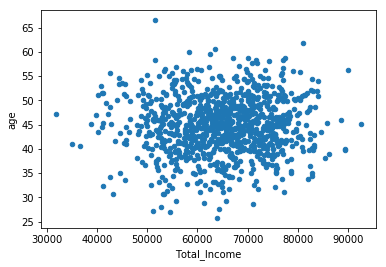

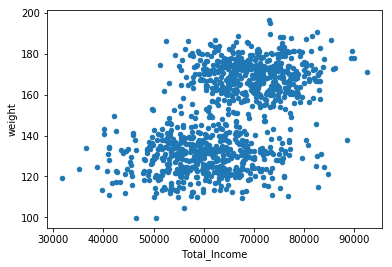

In [5]:
# Scatterplot before regression

SurveyIncome.plot(x = 'Total_Income', y = 'age', kind = 'scatter')
SurveyIncome.plot(x = 'Total_Income', y = 'weight', kind = 'scatter')

In [6]:
# Train the linear regression model using SurveyIncome dataset
import statsmodels.api as sm

X_vars = SurveyIncome[['Total_Income', 'weight']]
X_vars = sm.add_constant(X_vars, prepend=False)

y = SurveyIncome['age']

m = sm.OLS(y, X_vars)

res = m.fit(cov_type='HC3')
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.6042
Date:                Mon, 15 Oct 2018   Prob (F-statistic):              0.547
Time:                        22:23:15   Log-Likelihood:                -3199.4
No. Observations:                1000   AIC:                             6405.
Df Residuals:                     997   BIC:                             6419.
Df Model:                           2                                         
Covariance Type:                  HC3                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Total_Income   2.52e-05   2.34e-05      1.076   

The estimated model looks:

$$\widehat{Age}_{i} = 44.2097 + 0.0000252\times TotalIncome_{i} - 0.0067\times Weight_{i}$$

The estimators are not statistically significant, which implies weak linear correlation. However, I'll put up with this and go on with the following analysis.

In [7]:
# Impute the age variable for BestIncome dataset

def impute_age(x):
    return 44.2097 + 2.52e-05*x[4] - 0.0067*x[3]

BestIncome['age_imputed'] = BestIncome.apply(impute_age, axis = 1)
BestIncome.head()

,Labor_Income,Capital_Income,height,weight,Total_Income,age_imputed
0,52655.605507,9279.509829,64.568138,152.920634,61935.115336,44.745897
1,70586.979225,9451.016902,65.727648,159.534414,80037.996127,45.157777
2,53738.008339,8078.132315,66.268796,152.502405,61816.140654,44.745701
3,55128.180903,12692.670403,62.910559,149.218189,67820.851305,44.919024
4,44482.794867,9812.975746,68.678295,152.726358,54295.770612,44.554687


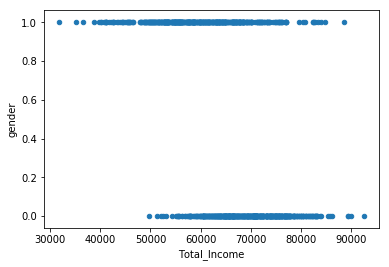

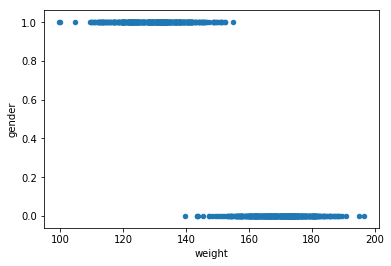

In [8]:
# Scatterplot before regression

SurveyIncome.plot(x = 'Total_Income', y = 'gender', kind = 'scatter')
SurveyIncome.plot(x = 'weight', y = 'gender', kind = 'scatter')

In [9]:
# Train the logistic regression model using SurveyIncome dataset

X_vars = SurveyIncome[['Total_Income', 'weight']]
X_vars = sm.add_constant(X_vars, prepend=False)

y = SurveyIncome['gender']

m = sm.Logit(y, X_vars)

res_1 = m.fit()
print(res_1.summary())

Optimization terminated successfully.
         Current function value: 0.036050
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:                 gender   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      997
Method:                           MLE   Df Model:                            2
Date:                Mon, 15 Oct 2018   Pseudo R-squ.:                  0.9480
Time:                        22:24:38   Log-Likelihood:                -36.050
converged:                       True   LL-Null:                       -693.15
                                        LLR p-value:                4.232e-286
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Total_Income    -0.0002   4.25e-05     -3.660      0.000      -0.000   -7.22e-05
weight          -0.446

The estimated model looks:

$$\widehat{logit\,(p_{i})} = 76.7929 - 0.0002\times TotalIncome_{i} - 0.4460\times Weight_{i}$$

We then impute the gender of each individaul `as female if the predicted probability is greater than 0.5`

In [10]:
# Impute the age variable for BestIncome dataset

predictData = sm.add_constant \
    (BestIncome[['Total_Income', 'weight']], prepend = False)

BestIncome['gender_imputed'] = (res_1.predict(predictData)>0.5).apply(float)
BestIncome.head()

,Labor_Income,Capital_Income,height,weight,Total_Income,age_imputed,gender_imputed
0,52655.605507,9279.509829,64.568138,152.920634,61935.115336,44.745897,0.0
1,70586.979225,9451.016902,65.727648,159.534414,80037.996127,45.157777,0.0
2,53738.008339,8078.132315,66.268796,152.502405,61816.140654,44.745701,0.0
3,55128.180903,12692.670403,62.910559,149.218189,67820.851305,44.919024,0.0
4,44482.794867,9812.975746,68.678295,152.726358,54295.770612,44.554687,1.0


#### (c) Here is where I'll report the descriptive statistics for my new imputed variables.

In [11]:
BestIncome[['age_imputed','gender_imputed']].describe()

,age_imputed,gender_imputed
count,10000.000000,10000.000000
mean,44.894036,0.454600
std,0.219066,0.497959
min,43.980016,0.000000
25%,44.747065,0.000000
50%,44.890281,0.000000
75%,45.042239,1.000000
max,45.706849,1.000000


#### (d) Correlation matrix for the now six variables

In [12]:
# Correlation matrix: in matrix form

corr = BestIncome.corr()
corr.style.background_gradient()

,Labor_Income,Capital_Income,height,weight,Total_Income,age_imputed,gender_imputed
Labor_Income,1,0.0053253,0.00278978,0.00450691,0.970191,0.924329,-0.215469
Capital_Income,0.0053253,1,0.0215716,0.00629868,0.247504,0.234234,-0.0625691
height,0.00278978,0.0215716,1,0.172103,0.00793078,-0.0449272,-0.127416
weight,0.00450691,0.00629868,0.172103,1,0.0058932,-0.299395,-0.763821
Total_Income,0.970191,0.247504,0.00793078,0.0058932,1,0.952348,-0.223931
age_imputed,0.924329,0.234234,-0.0449272,-0.299395,0.952348,1,0.0193158
gender_imputed,-0.215469,-0.0625691,-0.127416,-0.763821,-0.223931,0.0193158,1


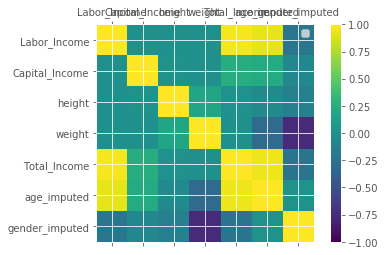

In [13]:
# Correlation matrix: in Matrix Plot
plt.style.use('ggplot')

names = BestIncome.columns
N = len(names)

correlations = BestIncome.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1.0, vmax=1.0)
fig.colorbar(cax)
ticks = np.arange(0,N,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.legend('best')
plt.show()

### 2. Stationarity and data drift

#### (a) Estimate by OLS and report coefficients

In [14]:
# Read in my third data set
# Name my variables

IncomeIntel = pd.read_table(
    "D:\persp-analysis_A18\Assignments\A2\IncomeIntel.txt", sep = ',', header = None)
IncomeIntel = IncomeIntel.rename(
    columns = {0:'grad_year', 1:'gre_quant', 2:'salary_p4'})
IncomeIntel.head()

,grad_year,gre_quant,salary_p4
0,2001.0,739.737072,67400.475185
1,2001.0,721.811673,67600.584142
2,2001.0,736.277908,58704.880589
3,2001.0,770.498485,64707.290345
4,2001.0,735.002861,51737.324165


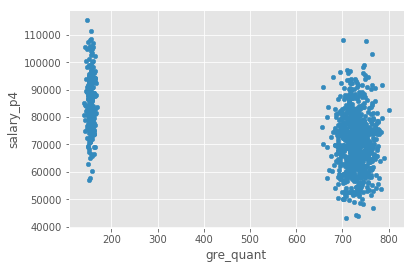

In [15]:
IncomeIntel.plot(x = 'gre_quant', y = 'salary_p4', kind = 'scatter')

In [16]:
# Train the linear regression model
# Report estimated coefficients and SE

X_vars = IncomeIntel['gre_quant']
X_vars = sm.add_constant(X_vars, prepend = False)

y = IncomeIntel['salary_p4']

m = sm.OLS(y, X_vars)
res_2 = m.fit(cov_type = 'HC3')

print(res_2.summary())

                            OLS Regression Results                            
Dep. Variable:              salary_p4   R-squared:                       0.263
Model:                            OLS   Adj. R-squared:                  0.262
Method:                 Least Squares   F-statistic:                     358.1
Date:                Mon, 15 Oct 2018   Prob (F-statistic):           1.74e-68
Time:                        22:24:52   Log-Likelihood:                -10673.
No. Observations:                1000   AIC:                         2.135e+04
Df Residuals:                     998   BIC:                         2.136e+04
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
gre_quant    -25.7632      1.361    -18.924      0.0

The estimated model looks:

$$salary\_4years_{i} = 89540 - 25.7632\times gre\_quant_{i}$$

The estimated effect of gre score is a bit counter-intuitive, as we would expect higher gre score associated with better earnings. There are two contributing factors to this result:

- The data generation process didn't conform to our intuition of a positive relationship.
- The salary_p4 variable on average grows each year, but due to the change in gre score scaling, lower gre scores after 2010 are associated with higher salaries

Therefore, though strange, **my hypothesis would be that gre scores are negatively associated with salaries after four years.**

#### (b) Create a scatterplot of GRE score and graduation year. 

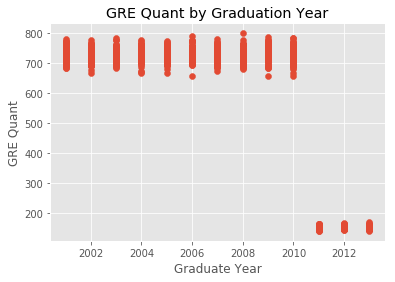

In [17]:
# Code and output of scatterplot

plt.figure()
x = IncomeIntel['grad_year']
y = IncomeIntel['gre_quant']
plt.scatter(x = x, y = y)
plt.xlabel('Graduate Year'); plt.ylabel('GRE Quant')
plt.title('GRE Quant by Graduation Year')
plt.show()

Problem: Here we can observe clear and substantial **drift** in gre quant score, due to the change in scoring scale. Therefore, I would propose to map the gre scores before 2011 to the new gre scale by doing `gre_quant*170/800 if grad_year<2011`.

In [18]:
# Code to implement solution
gre_norm = IncomeIntel[['grad_year', 'gre_quant']] \
   .apply(lambda x: x['gre_quant']*170/800 
          if x['grad_year']<2011 else x['gre_quant'], axis = 1)

IncomeIntel['gre_norml'] = gre_norm
IncomeIntel.head()

,grad_year,gre_quant,salary_p4,gre_norml
0,2001.0,739.737072,67400.475185,157.194128
1,2001.0,721.811673,67600.584142,153.384980
2,2001.0,736.277908,58704.880589,156.459055
3,2001.0,770.498485,64707.290345,163.730928
4,2001.0,735.002861,51737.324165,156.188108


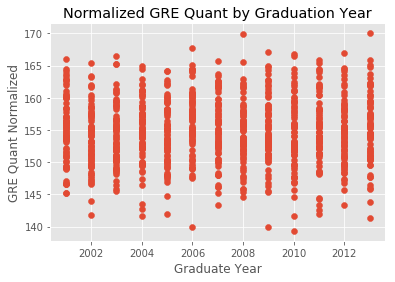

In [19]:
# Draw the scatterplot again and the drifting effect seems eliminated

plt.figure()
x = IncomeIntel['grad_year']
y = IncomeIntel['gre_norml']
plt.scatter(x = x, y = y)
plt.xlabel('Graduate Year'); plt.ylabel('GRE Quant Normalized')
plt.title('Normalized GRE Quant by Graduation Year')
plt.show()

#### (c) Create a scatterplot of income and graduation year

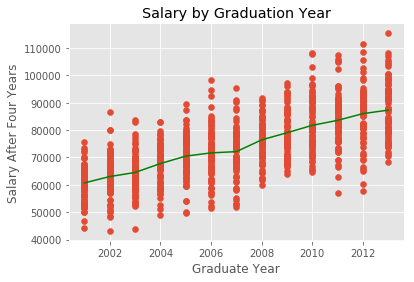

In [20]:
# Code and output of scatterplot

plt.figure()
x = IncomeIntel['grad_year']
y = IncomeIntel['salary_p4']
plt.scatter(x = x, y = y)
x_mean = IncomeIntel.groupby('grad_year').mean().index
y_mean = IncomeIntel.groupby('grad_year').mean()['salary_p4']
plt.plot(x_mean, y_mean, 'g-')
plt.xlabel('Graduate Year'); plt.ylabel('Salary After Four Years')
plt.title('Salary by Graduation Year')
plt.show()

The average salary by year indicates non-stationarity: there seems to be an upward trending in these people's earnings. Therefore, we need to detrend this variable. Myt strategy is to first calculate the average grwoth rate, and then dicount their salaries ``divide by (1 + avg_growth_rate) ** (grad_year - 2001)`` down to the base year, so that we could eliminate the trend effects and make salaries across years comparable.

In [21]:
# Calculate the mean salary each year
avg_inc_by_year = IncomeIntel['salary_p4'] \
    .groupby(IncomeIntel['grad_year']).mean().values 

# Calculate the average growth rate in salaries across all 13 years
avg_growth_rate = ((avg_inc_by_year[1:] - avg_inc_by_year[:-1]) 
                   / avg_inc_by_year[:-1]).mean()

# Discount the salaries
IncomeIntel['salary_p4_disc'] \
    = IncomeIntel.apply(
    lambda x: x['salary_p4']/((1 +avg_growth_rate)**(x['grad_year']-2001)), axis = 1)

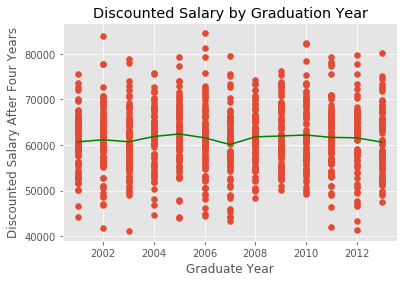

In [22]:
# Draw the scatterplot again

plt.figure()
x = IncomeIntel['grad_year']
y = IncomeIntel['salary_p4_disc']
plt.scatter(x = x, y = y)
x_mean = IncomeIntel.groupby('grad_year').mean().index
y_mean = IncomeIntel.groupby('grad_year').mean()['salary_p4_disc']
plt.plot(x_mean, y_mean, 'g-')
plt.xlabel('Graduate Year'); plt.ylabel('Discounted Salary After Four Years')
plt.title('Discounted Salary by Graduation Year')
plt.show()

#### (d) Re-estimate coefficients with updated variables.

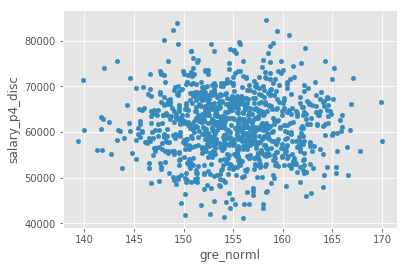

In [23]:
IncomeIntel.plot(x = 'gre_norml', y = 'salary_p4_disc', kind = 'scatter')

In [24]:
# Train the linear regression model after data transformation
# Report estimated coefficients and SE

X_vars = IncomeIntel['gre_norml']
X_vars = sm.add_constant(X_vars, prepend = False)

y = IncomeIntel['salary_p4_disc']

m = sm.OLS(y, X_vars)
res_3 = m.fit(cov_type = 'HC3')

print(res_3.summary())

                            OLS Regression Results                            
Dep. Variable:         salary_p4_disc   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.6710
Date:                Mon, 15 Oct 2018   Prob (F-statistic):              0.413
Time:                        22:25:17   Log-Likelihood:                -10291.
No. Observations:                1000   AIC:                         2.059e+04
Df Residuals:                     998   BIC:                         2.060e+04
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
gre_norml    -34.9747     42.698     -0.819      0.4

The coefficients changed substantially after we coped with data drift and non-stationarity:

$$salary\_4years_{i} = 66830 - 34.9747\times gre\_quant_{i}$$

Compared with the previous model:

$$salary\_4years_{i} = 89540 - 25.7632\times gre\_quant_{i}$$

The estimated effect of gre score has dropped in value (increased in scale), and this aligns with our hypothesis **(gre scores are negatively associated with salaries after four years)**. There are two contradicting factors that cause this change:

- a) The elimination of time trends would make the coefficient less negative, since new gre scores (lower scale) are not systematically assocaited with higher salary (time trend).
- b) By mapping the old gre scores to the new scale, we would expect the marginal effects of gre score be higher, since new gre scores are based on a narrower scale.

**Finally, it seems that factor b) dominates the change.**

In [25]:
# Train the linear regression model after data transformation
# Report estimated coefficients and SE

X_vars = IncomeIntel['gre_norml']
X_vars = sm.add_constant(X_vars, prepend = False)

y = IncomeIntel['salary_p4']

m = sm.OLS(y, X_vars)
res_3 = m.fit(cov_type = 'HC3')

print(res_3.summary())

                            OLS Regression Results                            
Dep. Variable:              salary_p4   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.06150
Date:                Mon, 15 Oct 2018   Prob (F-statistic):              0.804
Time:                        22:25:19   Log-Likelihood:                -10825.
No. Observations:                1000   AIC:                         2.165e+04
Df Residuals:                     998   BIC:                         2.166e+04
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
gre_norml    -18.8463     75.996     -0.248      0.8

### 3. Assessment of Kossinets and Watts.

See attached PDF. 